In [6]:
import numpy as np
import os
import cv2
from insightface.app import FaceAnalysis
from glob import glob
from tqdm import tqdm
from collections import defaultdict
from PIL import Image
from IPython.display import display, Image

In [7]:
def get_averages(names, scores):
    d = defaultdict(list)
    for n, s in zip(names, scores):
        d[n].append(s)

    averages = {}
    for n, s in d.items():
        averages[n] = np.mean(s)
    return averages

def judge_sim(known_embeddings, known_names, unknown_embeddings, threshold):
    pred_names = []
    for emb in unknown_embeddings:
        scores = np.dot(emb, known_embeddings.T)
        scores = np.clip(scores, 0., None)

        averages = get_averages(known_names, scores)
        pred = sorted(averages, key=lambda x: averages[x], reverse=True)[0]
        print(averages)
        score = averages[pred]

        if score > threshold:
            pred_names.append(pred)
        else:
            pred_names.append(None)
    
    return pred_names

def draw_on(img, faces, name):
    dimg = img.copy()
    for i in range(len(faces)):
        face = faces[i]
        box = face.bbox.astype(int)
        color = (0, 0, 255)
        cv2.rectangle(dimg, (box[0], box[1]), (box[2], box[3]), color, 2)
        if face.kps is not None:
            kps = face.kps.astype(int)
            #print(landmark.shape)
            for l in range(kps.shape[0]):
                color = (0, 0, 255)
                if l == 0 or l == 3:
                    color = (0, 255, 0)
                cv2.circle(dimg, (kps[l][0], kps[l][1]), 1, color, 2)
        cv2.putText(dimg, name[i], (box[0]-1, box[1]-4),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,0),1)

    return dimg

In [8]:
known_names = []
known_embeddings = []
app_pre = FaceAnalysis(name='buffalo_s',root='~/.insightface/models/')
app_pre.prepare(ctx_id=0, det_size=(640, 640))

/Users/tayamayuto/Face_recognition_IF/face_env/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/w6

In [9]:
select_data = 'lfw'

In [10]:
players = os.listdir(f'/Users/tayamayuto/Face_recognition_IF/data/{select_data}')

for player in tqdm(players[0:500]):
    print(player)
    player_embeddings, player_names = [], []

    img_paths = glob(f'/Users/tayamayuto/Face_recognition_IF/data/{select_data}/{player}/*')
    
    for img_path in img_paths:
        img = cv2.imread(img_path)
        if img is None: continue

        faces = app_pre.get(np.array(img))
        if len(faces) == 0 : continue
        player_embeddings.append(faces[0].embedding)
        player_names.append(player)

        if len(known_embeddings) == 10: break
    
    player_embeddings = np.stack(player_embeddings, axis=0)
    known_embeddings.append(player_embeddings)
    known_names += player_names
known_embeddings = np.concatenate(known_embeddings, axis=0)
        

  0%|          | 0/500 [00:00<?, ?it/s]/Users/tayamayuto/Face_recognition_IF/face_env/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4
  0%|          | 1/500 [00:00<01:07,  7.35it/s]

German_Khan
Dragan_Covic


  1%|          | 3/500 [00:00<00:51,  9.64it/s]

Jeff_Hornacek
Sureyya_Ayhan
Deb_Santos


  1%|▏         | 7/500 [00:00<00:41, 11.94it/s]

Bob_Newhart
Wang_Hailan
Paul_McNulty
Claudia_Pechstein


  2%|▏         | 9/500 [00:01<01:11,  6.86it/s]

Ranil_Wickremasinghe


  2%|▏         | 12/500 [00:01<01:06,  7.36it/s]

Ben_Chandler
Mark_Komara
Rand_Beers


  3%|▎         | 14/500 [00:01<01:01,  7.93it/s]

John_Bond
Reginald_Hudlin


  3%|▎         | 15/500 [00:01<00:58,  8.22it/s]

Mary-Kate_Olsen


  4%|▎         | 18/500 [00:02<01:12,  6.66it/s]

Xiang_Huaicheng
Phil_Mickelson
Gerry_Kelly
Salma_Hayek


  4%|▍         | 21/500 [00:03<01:59,  4.02it/s]

Jim_Edmonds
Martina_McBride


  4%|▍         | 22/500 [00:03<02:10,  3.67it/s]

Anthony_Pico
Jose_Theodore


  5%|▍         | 24/500 [00:04<01:38,  4.86it/s]

Heidi_Fleiss


  5%|▌         | 25/500 [00:04<01:44,  4.54it/s]

Mark_Richt


  5%|▌         | 26/500 [00:04<01:52,  4.21it/s]

Mike_Smith
Paul_ONeill


  6%|▌         | 29/500 [00:05<01:55,  4.06it/s]

Horace_Newcomb
Mohammad_Fares
JK_Rowling


  6%|▌         | 31/500 [00:06<01:54,  4.09it/s]

Shinya_Taniguchi
Tony_Curtis


  7%|▋         | 35/500 [00:06<01:13,  6.34it/s]

Laurie_Pirtle
Ray_Sherman
Nancy_Powell


  7%|▋         | 37/500 [00:06<00:59,  7.72it/s]

Kathryn_Tucker
Gro_Harlem_Brundtland


  8%|▊         | 38/500 [00:06<01:06,  6.97it/s]

Jacqueline_Marris
Mikhail_Gorbachev


  8%|▊         | 42/500 [00:07<00:52,  8.73it/s]

Takuma_Sato
Ray_Lewis
Hank_Aaron


  9%|▉         | 44/500 [00:07<00:45, 10.02it/s]

Chip_Knight
Ronald_Young_Jr
Gustavo_Cisneros


 10%|▉         | 48/500 [00:07<00:37, 12.02it/s]

Isidro_Pastor
Natalie_Williams
Angela_Lansbury


 10%|█         | 50/500 [00:07<00:44, 10.01it/s]

Cathy_Freeman
Milt_Palacio
Wilbert_Elki_Meza_Majino


 11%|█         | 54/500 [00:08<00:37, 11.84it/s]

Jack_Welch
Nizar_Trabelsi
Gonzalo_Barrientos


 11%|█         | 56/500 [00:08<00:35, 12.34it/s]

Jason_Biggs
Lisa_Leslie
Tyron_Garner


 12%|█▏        | 60/500 [00:08<00:37, 11.82it/s]

John_Sidgmore
Alexander_Payne
Brad_Brownell


 12%|█▏        | 62/500 [00:08<00:36, 12.11it/s]

John_Duprey
Ainsworth_Dyer
Christine_Ebersole


 13%|█▎        | 64/500 [00:08<00:38, 11.20it/s]

Amer_al-Saadi


 13%|█▎        | 66/500 [00:09<01:01,  7.10it/s]

Alison_Lohman
Duane_Lee_Chapman


 13%|█▎        | 67/500 [00:09<01:01,  7.00it/s]

Andre_Smith
Iban_Mayo


 14%|█▍        | 69/500 [00:09<00:58,  7.32it/s]

Jeong_Se-hyun


 14%|█▍        | 72/500 [00:10<01:30,  4.73it/s]

Charles_Rogers
Eric_Rosser
Ziwang_Xu


 15%|█▌        | 76/500 [00:11<00:56,  7.57it/s]

Larry_Pleau
Bill_Byrne
Peter_Gabriel
Paul_LeClerc


 16%|█▌        | 78/500 [00:11<00:47,  8.96it/s]

Shawn_Kemp
Liza_Minnelli


 16%|█▌        | 80/500 [00:11<01:13,  5.71it/s]

Toby_Keith
Horace_Donovan_Reid
David_Wells


 17%|█▋        | 84/500 [00:12<01:08,  6.06it/s]

Raul_Gonzalez
Alex_Popov
Anne_Donovan
Vin_Diesel


 17%|█▋        | 86/500 [00:12<01:06,  6.26it/s]

Stuart_Whitman
Jesse_Jackson


 18%|█▊        | 90/500 [00:14<01:23,  4.92it/s]

Valorie_Brabazon
Rob_Niedermayer
Lynne_Cheney


 19%|█▊        | 93/500 [00:14<01:06,  6.08it/s]

Minnie_Mendoza
Stephane_Rousseau
Rita_Wilson


 19%|█▉        | 94/500 [00:14<01:14,  5.42it/s]

Terence_Newman
Joseph_Biden


 20%|█▉        | 98/500 [00:15<01:04,  6.24it/s]

Tommy_Tubberville
Meles_Zenawi
Natasha_Henstridge


 20%|██        | 100/500 [00:15<00:52,  7.68it/s]

Trevor_McDonald
Pat_Burns


 20%|██        | 102/500 [00:15<00:48,  8.21it/s]

Caroline_Link
Clay_Campbell
Holly_Hunter


 21%|██        | 104/500 [00:16<01:11,  5.56it/s]

Sophia_Loren


 21%|██▏       | 107/500 [00:17<01:16,  5.17it/s]

Nicolas_Massu
Kaisser_Bazan
Bryan_Murray
Francois_Ozon


 22%|██▏       | 109/500 [00:17<01:02,  6.28it/s]

Mathias_Reichhold


 22%|██▏       | 111/500 [00:17<01:04,  6.02it/s]

Whoopi_Goldberg
Bill_Cartwright


 23%|██▎       | 113/500 [00:17<00:51,  7.57it/s]

Victor_Garber
Jeane_Kirkpatrick
Sue_Grafton


 23%|██▎       | 117/500 [00:18<00:36, 10.39it/s]

Manuel_Jesus
Giovanny_Cordoba
James_Sensenbrenner


 24%|██▍       | 119/500 [00:18<00:33, 11.50it/s]

Jennie_Finch
David_Westerfield
Costas_Simitis


 24%|██▍       | 122/500 [00:19<01:00,  6.26it/s]

Carlos_Iturgaitz
Mark_Shapiro
George_Lopez


 25%|██▌       | 126/500 [00:19<00:56,  6.67it/s]

Taylor_Twellman
Peter_Hartz
Gianna_Angelopoulos-Daskalaki


 26%|██▌       | 128/500 [00:20<01:00,  6.17it/s]

Beth_Jones
Brock_Berlin
James_McPherson


 26%|██▌       | 130/500 [00:20<00:46,  7.91it/s]

Geoff_Hoon


 26%|██▌       | 131/500 [00:20<01:13,  4.99it/s]

Elizabeth_Hurley


 26%|██▋       | 132/500 [00:21<01:32,  3.96it/s]

Hipolito_Mejia


 27%|██▋       | 135/500 [00:21<01:09,  5.29it/s]

Bart_Hendricks
David_Brown
Craig_Burley


 27%|██▋       | 137/500 [00:21<00:52,  6.91it/s]

Hermogenes_Ebdane_Jr
Joey_Harrington
Wolfgang_Schwarz


 28%|██▊       | 139/500 [00:21<00:43,  8.35it/s]

Saoud_Al_Faisal
Sebastian_Saja


 28%|██▊       | 142/500 [00:22<00:50,  7.15it/s]

Rick_Wagoner
Don_Henley


 29%|██▉       | 144/500 [00:22<00:41,  8.68it/s]

John_Baldacci
Dustin_Brown
Dominic_Monaghan


 29%|██▉       | 146/500 [00:22<00:35,  9.86it/s]

Chris_Byrd
Niall_Connolly


 30%|███       | 150/500 [00:23<00:35,  9.95it/s]

Richard_Palmer
Fazal-ur-Rehman
Boris_Jordan
Charlotte_Rampling


 31%|███       | 153/500 [00:23<00:39,  8.69it/s]

Hutomo_Mandala_Putra
Lars_Burgsmuller
Win_Aung


 31%|███▏      | 157/500 [00:24<00:43,  7.86it/s]

Billy_Bob_Thornton
Brett_Perry
Linda_Lingle


 32%|███▏      | 159/500 [00:24<00:44,  7.60it/s]

Robert_Ehrlich
Glenn_Rivers


 32%|███▏      | 161/500 [00:24<00:40,  8.30it/s]

David_Howard
Ian_Wilmut


 32%|███▏      | 162/500 [00:24<00:40,  8.28it/s]

Queen_Elizabeth_II


 33%|███▎      | 163/500 [00:25<01:44,  3.24it/s]

Ingrid_Betancourt
Grady_Irvin_Jr


 33%|███▎      | 165/500 [00:25<01:18,  4.25it/s]

Peter_Care
Prince_Edward


 33%|███▎      | 167/500 [00:26<01:04,  5.19it/s]

Jennifer_Aniston


 34%|███▍      | 170/500 [00:27<01:51,  2.96it/s]

Eric_Schacht
Steve_Stirling
Alberto_Acosta


 34%|███▍      | 172/500 [00:28<01:21,  4.00it/s]

Jim_Zorn
Billy_Tibbets
Justin_Leonard


 35%|███▌      | 176/500 [00:28<00:58,  5.50it/s]

Steve_Alford
Osmond_Smith
Miranda_Gaddis


 36%|███▌      | 178/500 [00:28<00:47,  6.72it/s]

Geovani_Lapentti
Alma_Powell
Jimmy_Lee


 36%|███▋      | 182/500 [00:29<00:35,  9.08it/s]

Shobha_De
Anil_Ramsook
Peter_Mullan


 37%|███▋      | 184/500 [00:29<00:31, 10.06it/s]

Herman_Moore
Mark_Martin
Din_Samsudin


 37%|███▋      | 186/500 [00:29<00:32,  9.56it/s]

Jason_Statham
Mike_Bair


 38%|███▊      | 190/500 [00:29<00:29, 10.45it/s]

Yana_Klochkova
Doug_Racine
Chan_Ho_Park


 38%|███▊      | 192/500 [00:29<00:27, 11.13it/s]

Elena_Likhovtseva
Paul_Ebert
Anita_DeFrantz


 39%|███▉      | 196/500 [00:30<00:25, 11.82it/s]

Lee_Nam-shin
Crispin_Glover
Kevin_Marshall


 40%|███▉      | 198/500 [00:30<00:25, 12.07it/s]

Sven_Ottke
Raf_Vallone
Nick_Reilly


 40%|████      | 200/500 [00:30<00:24, 12.16it/s]

Bob_Huggins


 40%|████      | 202/500 [00:31<00:39,  7.60it/s]

David_Zeplowitz
Tayshaun_Prince
Emmanuelle_Jagodsinski


 41%|████      | 205/500 [00:31<00:38,  7.62it/s]

Lyle_Vanclief
Paula_Locke


 41%|████▏     | 207/500 [00:31<00:41,  7.13it/s]

James_Mathis
Lou_Piniella


 42%|████▏     | 210/500 [00:32<00:39,  7.43it/s]

Soenarno
Tara_Reid
Christian_Von_Wernich
Jacques_Rogge


 43%|████▎     | 213/500 [00:33<01:04,  4.48it/s]

Nawabzada_Nasrullah_Khan
Catherine_Donkers


 43%|████▎     | 215/500 [00:33<00:47,  5.94it/s]

Agnelo_Queiroz
Henry_Hilow
Eric_Hinske


 44%|████▍     | 219/500 [00:33<00:38,  7.26it/s]

Chris_Cornell
Bonnie_Fuller
Matt_Morris


 44%|████▍     | 221/500 [00:34<00:36,  7.70it/s]

Harbhajan_Singh
Kim_Dong-hwa


 45%|████▍     | 223/500 [00:34<00:33,  8.15it/s]

Tim_Matheson
Dick_Smothers


 45%|████▌     | 225/500 [00:34<00:34,  7.95it/s]

Jia_Qinglin
Gerald_Calabrese


 45%|████▌     | 227/500 [00:34<00:29,  9.10it/s]

Rowan_Williams
Peter_Goldmark
Brian_Van_Dusen


 46%|████▌     | 229/500 [00:34<00:26, 10.07it/s]

Osama_bin_Laden
Stanley_McChrystal


 46%|████▌     | 231/500 [00:35<00:40,  6.58it/s]

Carlos_Ghosn


 47%|████▋     | 233/500 [00:35<00:44,  5.98it/s]

Jean_Todt
Wally_Szczerbiak


 47%|████▋     | 235/500 [00:35<00:35,  7.38it/s]

Zara_Akhmadova
Donald_Keck
Andy_Roddick


 47%|████▋     | 237/500 [00:37<01:19,  3.32it/s]

John_Paul_II


 48%|████▊     | 239/500 [00:38<01:33,  2.80it/s]

Paul_Tracy
Ismail_Khan
Svetislav_Pesic


 49%|████▊     | 243/500 [00:38<00:48,  5.27it/s]

Sven_Goran_Eriksson
Aline_Chretien
Jeffery_Hendren


 49%|████▉     | 245/500 [00:38<00:39,  6.51it/s]

Ian_Huntley
Andrew_Luster
Emilio_Azcarraga_Jean


 49%|████▉     | 247/500 [00:38<00:35,  7.21it/s]

Wilbert_Foy
Pham_Thi_Mai_Phuong


 50%|█████     | 251/500 [00:39<00:29,  8.32it/s]

William_McDonough
Linda_Franklin
Liane_Janda


 51%|█████     | 253/500 [00:39<00:28,  8.60it/s]

Jana_Pittman
Leuris_Pupo


 51%|█████     | 255/500 [00:39<00:31,  7.83it/s]

Martin_Sheen
Lisa_Girman


 51%|█████▏    | 257/500 [00:40<00:26,  9.13it/s]

Brian_Clemens
Larry_Donald
Colleen_Ryan


 52%|█████▏    | 259/500 [00:40<00:26,  9.19it/s]

Max_Baucus
Bill_Sizemore


 52%|█████▏    | 262/500 [00:40<00:26,  9.08it/s]

Sandra_Day_OConner
Mirela_Manjani


 53%|█████▎    | 263/500 [00:40<00:25,  9.15it/s]

Estella_Warren
Zoran_Djindjic


 53%|█████▎    | 267/500 [00:41<00:29,  7.90it/s]

Nate_Hybl
Ed_Case
Stephen_Funk
John_McEnroe


 54%|█████▍    | 269/500 [00:41<00:32,  7.05it/s]

Walter_Mondale


 54%|█████▍    | 270/500 [00:42<01:07,  3.40it/s]

Diana_Krall


 55%|█████▍    | 273/500 [00:43<00:59,  3.84it/s]

Heather_Willson
Felipe_De_Borbon
Carolina_Moraes


 55%|█████▌    | 275/500 [00:43<00:50,  4.47it/s]

Ali_Mohammed_Maher
Rick_Husband


 55%|█████▌    | 277/500 [00:43<00:37,  6.02it/s]

Stephanie_Zimbalist
Shanna_Zolman
Isaiah_Washington


 56%|█████▌    | 280/500 [00:44<00:34,  6.46it/s]

Edgar_Savisaar
Dave_Tucker


 56%|█████▋    | 282/500 [00:44<00:28,  7.63it/s]

Brandon_Larson
Phoenix_Chang
Penelope_Ann_Miller


 57%|█████▋    | 285/500 [00:44<00:27,  7.75it/s]

Natalie_Juniardi
Ted_Maher


 58%|█████▊    | 288/500 [00:45<00:25,  8.39it/s]

Noor_Mohammed
Walt_Harris
Olivera_Labus


 58%|█████▊    | 290/500 [00:45<00:21,  9.55it/s]

Stephen_Covey
Woodrow_Stanley
Yuvraj_Singh


 59%|█████▉    | 294/500 [00:45<00:19, 10.64it/s]

Bobby_Bowden
Hussein_Malik
Tom_Hanks


 59%|█████▉    | 296/500 [00:46<00:47,  4.28it/s]

Gary_Gitnick
Mike_Richter
Luke_Walton


 60%|██████    | 300/500 [00:47<00:32,  6.09it/s]

Denys_Arcand
Bill_Butler
Michael_Goldrich


 60%|██████    | 302/500 [00:47<00:27,  7.22it/s]

Yekaterina_Guseva
Darren_Clarke
Intisar_Ajouri


 61%|██████    | 304/500 [00:47<00:35,  5.58it/s]

Cristiano_da_Matta
Hugh_Carey


 61%|██████▏   | 307/500 [00:48<00:28,  6.73it/s]

Danny_Glover
Peter_Hunt
Steven_Feldman


 62%|██████▏   | 310/500 [00:48<00:25,  7.55it/s]

Dinah_Turner
Rosny_Desroches


 62%|██████▏   | 312/500 [00:48<00:21,  8.80it/s]

Cosmo_Iacavazzi
Daniel_Day-Lewis


 63%|██████▎   | 315/500 [00:49<00:23,  7.95it/s]

Robert_Wiener
Derrick_Battie
Candice_Beatty


 64%|██████▎   | 318/500 [00:49<00:21,  8.46it/s]

Gerald_Riley
Julie_Andrews
Jean-Marc_de_La_Sabliere


 64%|██████▍   | 319/500 [00:49<00:27,  6.57it/s]

Zhang_Ziyi


 64%|██████▍   | 321/500 [00:50<00:32,  5.49it/s]

Kurt_Busch
Roberto_Lavagna
Dick_Cheney


 65%|██████▌   | 325/500 [00:51<00:47,  3.69it/s]

Hamza_Atiya_Muhsen
David_Hilt
Susan_Walvius


 65%|██████▌   | 327/500 [00:52<00:36,  4.77it/s]

Kim_Weeks
Darryl_Stingley
Colin_Prescot


 66%|██████▌   | 329/500 [00:52<00:28,  5.93it/s]

Felix_Mantilla


 66%|██████▌   | 330/500 [00:52<00:33,  5.14it/s]

Frank_Van_Ecke


 66%|██████▌   | 331/500 [00:52<00:34,  4.87it/s]

Mike_Sherman
David_Myers


 67%|██████▋   | 334/500 [00:53<00:27,  5.96it/s]

Guillermo_Ruiz_Polanco
Ken_Loach


 67%|██████▋   | 336/500 [00:53<00:22,  7.24it/s]

Robert_Flodquist
Ben_Lee
Aung_San_Suu_Kyi


 68%|██████▊   | 339/500 [00:53<00:22,  7.11it/s]

Keith_Brown
Thomas_Gottschalk


 68%|██████▊   | 341/500 [00:54<00:22,  7.20it/s]

Shae-Lynn_Bourne
Bob_Sulkin


 68%|██████▊   | 342/500 [00:54<00:21,  7.28it/s]

Chakib_Khelil


 69%|██████▉   | 344/500 [00:54<00:27,  5.60it/s]

Robert_Wagner
William_Cocksedge


 69%|██████▉   | 346/500 [00:54<00:22,  6.94it/s]

Giselle_Estefania_Tavarelli
Lorne_Michaels


 70%|██████▉   | 348/500 [00:55<00:23,  6.37it/s]

Ricky_Barnes
Laura_Ziskin


 70%|███████   | 351/500 [00:55<00:18,  8.20it/s]

Ray_Evernham
Pedro_Velasquez
Marion_Fahnestock


 71%|███████   | 353/500 [00:55<00:18,  7.86it/s]

Jane_Pauley
Bernardo_Segura


 71%|███████   | 354/500 [00:55<00:22,  6.50it/s]

Padraig_Harrington


 71%|███████   | 356/500 [00:56<00:25,  5.72it/s]

Luke_Smith
Jeffrey_Pfeffer


 72%|███████▏  | 358/500 [00:56<00:19,  7.14it/s]

Brandon_Boyd
Jim_Jeffords


 72%|███████▏  | 359/500 [00:56<00:20,  6.82it/s]

Claudio_Abbado
Chen_Liang_Yu


 72%|███████▏  | 362/500 [00:57<00:20,  6.76it/s]

Maura_Tierney
John_Danforth
Cheryl_Hines


 73%|███████▎  | 366/500 [00:57<00:16,  8.20it/s]

Timothy_Goebel
Frank_Sinatra
Marissa_Jaret_Winokur


 74%|███████▎  | 368/500 [00:57<00:17,  7.44it/s]

Masamori_Tokuyama
Bill_Rainer
Ken_Watanabe


 74%|███████▍  | 372/500 [00:58<00:16,  7.57it/s]

Kimora_Lee
Sanjay_Gupta
Gary_Locke


 75%|███████▌  | 375/500 [00:58<00:15,  8.16it/s]

Sinead_OConnor
James_W_Kennedy
Kurt_Suzuki


 75%|███████▌  | 377/500 [00:59<00:13,  9.08it/s]

Frederick_Madden
Priscilla_Owen


 76%|███████▌  | 378/500 [00:59<00:15,  8.09it/s]

Malcolm_Jamal_Warner
Naoto_Kan


 76%|███████▌  | 381/500 [00:59<00:18,  6.52it/s]

Sue_Guevara
John_Sweeney


 77%|███████▋  | 383/500 [00:59<00:14,  7.87it/s]

Brian_Cashman
Marco_Pantani
Theodore_Tweed_Roosevelt


 77%|███████▋  | 387/500 [01:00<00:13,  8.37it/s]

Se_Hyuk_Joo
Ian_Moran
Michael_Olowokandi


 78%|███████▊  | 389/500 [01:00<00:11,  9.42it/s]

James_Brosnahan
Kevin_Nealon
Miguel_Estrada


 78%|███████▊  | 392/500 [01:00<00:12,  8.87it/s]

Alison_Krauss
Bill_Callahan


 79%|███████▊  | 393/500 [01:01<00:14,  7.29it/s]

Allison_Searing
Torri_Edwards


 79%|███████▉  | 395/500 [01:01<00:13,  7.61it/s]

Bryan_Thomas
Kathy_Baker


 79%|███████▉  | 397/500 [01:01<00:13,  7.54it/s]

Martha_Stewart


 80%|████████  | 400/500 [01:02<00:17,  5.69it/s]

William_Hurt
Serge_Tchuruk
Michael_Brandon


 80%|████████  | 401/500 [01:02<00:16,  6.15it/s]

Adam_Sandler


 81%|████████  | 403/500 [01:03<00:20,  4.76it/s]

Sam_Gerald
Laura_Linney


 81%|████████  | 405/500 [01:03<00:21,  4.41it/s]

Aitor_Gonzalez
Hamzah_Haz


 82%|████████▏ | 408/500 [01:04<00:17,  5.32it/s]

James_Young
Misty_Dawn_Clymer
Bronson_Arroyo


 82%|████████▏ | 410/500 [01:04<00:14,  6.21it/s]

Curtis_Rodriguez
Paul_Burrell


 82%|████████▏ | 412/500 [01:06<00:33,  2.60it/s]

Jennie_Garth
Irina_Yatchenko
Don_Matthews


 83%|████████▎ | 415/500 [01:06<00:18,  4.57it/s]

David_Eldon
Christian_Wulff


 83%|████████▎ | 416/500 [01:06<00:18,  4.53it/s]

Paul_Byrd


 84%|████████▍ | 419/500 [01:07<00:14,  5.56it/s]

Derek_Bond
Wolfgang_Clement
Carol_Williams


 84%|████████▍ | 421/500 [01:07<00:12,  6.42it/s]

John_Goold
Mesut_Yilmaz


 85%|████████▍ | 423/500 [01:07<00:14,  5.35it/s]

John_Dallager
Cecile_de_France


 85%|████████▌ | 425/500 [01:08<00:11,  6.34it/s]

Adrian_Fernandez
Alan_Greer


 85%|████████▌ | 427/500 [01:08<00:12,  5.85it/s]

Mike_Babcock
Casy_Preslar
Giuseppe_Gibilisco


 86%|████████▌ | 430/500 [01:09<00:13,  5.25it/s]

Wesley_Clark
Tom_Osborne


 86%|████████▌ | 431/500 [01:09<00:11,  5.85it/s]

Robert_Mueller


 87%|████████▋ | 433/500 [01:09<00:14,  4.61it/s]

Keith_Urban
Steve_Cox
Carly_Fiorina


 87%|████████▋ | 435/500 [01:10<00:12,  5.02it/s]

Irv_Nathan


 87%|████████▋ | 436/500 [01:10<00:12,  4.93it/s]

Goh_Kun


 87%|████████▋ | 437/500 [01:10<00:13,  4.76it/s]

Imam_Samudra


 88%|████████▊ | 439/500 [01:10<00:11,  5.22it/s]

Leon_Barmore
Martha_Beatriz_Roque


 88%|████████▊ | 440/500 [01:11<00:12,  4.98it/s]

Lope_Mendoza
Roberto_Benigni


 88%|████████▊ | 442/500 [01:11<00:10,  5.77it/s]

Vincent_Sombrotto
Scott_Rudin


 89%|████████▉ | 444/500 [01:11<00:08,  6.35it/s]

Jesus_Cardenal


 89%|████████▉ | 445/500 [01:11<00:10,  5.35it/s]

Kimi_Raikkonen


 89%|████████▉ | 446/500 [01:12<00:11,  4.50it/s]

Warren_Beatty


 90%|████████▉ | 449/500 [01:12<00:08,  5.85it/s]

Sherri_Coale
Matt_Roney
Michelle_Branch


 90%|█████████ | 450/500 [01:12<00:08,  5.77it/s]

Teresa_Graves
Michel_Temer


 90%|█████████ | 452/500 [01:13<00:08,  5.51it/s]

Benazir_Bhutto


 91%|█████████ | 455/500 [01:14<00:09,  4.99it/s]

Uday_Hussein
Brad_Russ
Gracia_Burnham


 91%|█████████▏| 457/500 [01:14<00:06,  6.25it/s]

James_Watt
Reggie_Sanders
Orrin_Hatch


 92%|█████████▏| 460/500 [01:14<00:06,  6.07it/s]

Howard_Schultz
Piers_Sellers


 92%|█████████▏| 462/500 [01:14<00:05,  7.18it/s]

Doug_Christie
Larry_Harris
Lin_Yung_Hsi


 93%|█████████▎| 464/500 [01:15<00:04,  8.15it/s]

Abdullah_al-Attiyah


 93%|█████████▎| 466/500 [01:15<00:05,  6.11it/s]

Vladimir_Ustinov
Dustan_Mohr
Farouk_Kaddoumi


 94%|█████████▍| 470/500 [01:16<00:04,  7.42it/s]

Shigeru_Ishiba
Peter_Sejna
Robert_Tyrrell


 94%|█████████▍| 472/500 [01:16<00:03,  7.88it/s]

Beyonce_Knowles
Brandon_Inge


 95%|█████████▍| 474/500 [01:16<00:03,  8.06it/s]

Ignatius_Wang
Patsy_Kensit


 95%|█████████▌| 476/500 [01:16<00:03,  7.73it/s]

Keith_Lockhart
Spencer_Abraham


 96%|█████████▌| 478/500 [01:18<00:08,  2.61it/s]

Ronde_Barber
Antonio_Palocci


 96%|█████████▌| 479/500 [01:19<00:10,  2.08it/s]

Desmon_Farmer
Dieter_Holzer


 96%|█████████▌| 481/500 [01:19<00:06,  2.98it/s]

Stacey_Yamaguchi


 97%|█████████▋| 483/500 [01:19<00:04,  3.76it/s]

Viara_Vike-Freiberga
Lokendra_Bahadur_Chand


 97%|█████████▋| 486/500 [01:20<00:02,  5.82it/s]

Ivan_Shvedoff
Dana_Vollmer
Bob_Curtis


 98%|█████████▊| 488/500 [01:20<00:01,  6.48it/s]

John_Burnett
Thomas_Cloyd


 98%|█████████▊| 490/500 [01:20<00:01,  7.22it/s]

Katrin_Cartlidge
Horst_Koehler


 98%|█████████▊| 491/500 [01:20<00:01,  5.73it/s]

Julian_Battle
Billy_Crawford


 99%|█████████▉| 494/500 [01:21<00:00,  7.13it/s]

Carolyn_Kuhl
Marc_Gold


 99%|█████████▉| 496/500 [01:21<00:00,  8.06it/s]

Jerry_Pauley
Li_Ka-shing


 99%|█████████▉| 497/500 [01:21<00:00,  7.55it/s]

Vaclav_Havel


100%|█████████▉| 499/500 [01:22<00:00,  3.33it/s]

Jorge_Quiroga
Manijeh_Hekmat


100%|██████████| 500/500 [01:23<00:00,  6.02it/s]


In [22]:
img_path = '/Users/tayamayuto/Face_recognition_IF/data/lfw/German_Khan/German_Khan_0001.jpg'

img = cv2.imread(img_path)

app = FaceAnalysis(name='buffalo_s',root='~/.insightface/models/')
app.prepare(ctx_id=0, det_size=(640, 640))

faces = app.get(np.array(img))

unknown_embeddings = []
for i in range(len(faces)):
    unknown_embeddings.append(faces[i].embedding)

pred_names = judge_sim(known_embeddings, known_names, unknown_embeddings, 95)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/models/buffalo_s/w6

In [23]:
print(pred_names)

['German_Khan']


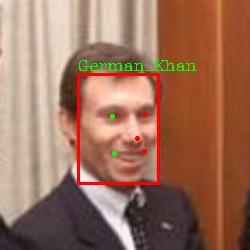

In [24]:
detect = draw_on(img, faces, pred_names)

#cv2.imwrite('/Users/tayamayuto/Face_recognition_IF/data/output/4_men.jpeg', detect)

_, buf = cv2.imencode(".jpg", detect)
display(Image(data=buf.tobytes()))